# SymPyを使った数式処理
Pythonにおいて代数的な操作・数式処理をおこなうためのパッケージ[SymPy](https://www.sympy.org)の簡単な使い方紹介する．

後半では題材としてロトカ-ボルテラ モデルを扱い，
* 平衡点の導出
* 局所安定性の解析

を例に連立方程式を解析的に解いたり，数値演算と組み合わせて固有値を計算する方法を紹介する．

## SymPyの基本的な使い方

In [1]:
import sympy

### `Symbol`：変数や数式
変数や数式は`Symbol`クラスのオブジェクトとして表現される．

`Symbol`クラスのオブジェクトは`sympy.Symbol`に引数となる文字列を渡して作成できる．このとき引数として渡した文字列が変数の表記になる．

In [2]:
x = sympy.Symbol("x")
y = sympy.Symbol("y")

print(x,type(x))
print(y,type(y))

x <class 'sympy.core.symbol.Symbol'>
y <class 'sympy.core.symbol.Symbol'>


これらは記号のまま計算できる．また，他の変数に代入することも可能．

In [3]:
x**2 + x + x* (y+2)

x**2 + x*(y + 2) + x

In [4]:
z = x**2 + x + x* (y+2)

In [5]:
z

x**2 + x*(y + 2) + x

複数の記号をまとめて定義することもできる．
その場合は，`symbols()`関数を利用する．

In [6]:
x, y = sympy.symbols("x, y")

print(x,type(x))
print(y,type(y))

x <class 'sympy.core.symbol.Symbol'>
y <class 'sympy.core.symbol.Symbol'>


### 式の操作
作成した式を因数分解したり，展開したり，整理したりできる．

#### 因数分解 
因数分解には`factor()`関数を利用する．

多項式
$$2 x y^{2} - 28 x y + 98 x + 11 y^{2} - 154 y + 539
$$
を因数分解してみよう．

In [7]:
x, y = sympy.symbols("x, y")

In [8]:
sympy.factor(2*x*y**2 - 28*x*y + 98*x + 11*y**2 - 154*y + 539
)

(2*x + 11)*(y - 7)**2

In [9]:
print(sympy.factor(2*x*y**2 - 28*x*y + 98*x + 11*y**2 - 154*y + 539
))

(2*x + 11)*(y - 7)**2


もっと複雑な多項式の因数分解もできるので試してみよう．

#### 展開
式の展開には`expand()`関数を利用する．

まずは，先程の因数分解された結果を展開して元通りに展開されるか確認してみる．

In [10]:
sympy.expand((2*x + 11)*(y - 7)**2)

2*x*y**2 - 28*x*y + 98*x + 11*y**2 - 154*y + 539

より複雑な式も展開できる．
例えば，

$$
(a x + 11)(y - b)^2 (z^c+2 z^2-5)
$$

のような式を展開してみる．

In [11]:
z,a,b,c = sympy.symbols("z, a, b, c")

In [12]:
sympy.expand((a*x + 11)*((y - b)**2)*(z**c+2*z**2-5))

2*a*b**2*x*z**2 + a*b**2*x*z**c - 5*a*b**2*x - 4*a*b*x*y*z**2 - 2*a*b*x*y*z**c + 10*a*b*x*y + 2*a*x*y**2*z**2 + a*x*y**2*z**c - 5*a*x*y**2 + 22*b**2*z**2 + 11*b**2*z**c - 55*b**2 - 44*b*y*z**2 - 22*b*y*z**c + 110*b*y + 22*y**2*z**2 + 11*y**2*z**c - 55*y**2

#### 式の整理
式の整理に`simplify()`関数が利用できる．
$$
\sin(\theta)^2 + \cos(\theta)^2 = 1
$$
を確認してみよう．

In [13]:
theta = sympy.Symbol("θ")

In [14]:
sympy.simplify(sympy.sin(theta)**2 + sympy.cos(theta)**2)

1

ある変数の定義域などの条件を付して式を簡略化するなどもできる．
$x>0$を仮定し，$\sqrt{x^2}$を簡略化してみよう．

In [15]:
x = sympy.Symbol("x")

In [16]:
sympy.simplify(sympy.sqrt(x**2))

sqrt(x**2)

In [17]:
x = sympy.Symbol("x", positive = True)

In [18]:
sympy.simplify(sympy.sqrt(x**2))

x

### 方程式を解析的に解く
以下の２次方程式を`solve()`関数を使って解いてみよう．
$$
a x^2 + b x + c = 0
$$

In [19]:
x, a, b, c = sympy.symbols("x, a, b, c")

In [20]:
sol = sympy.solve(a*x**2 + b*x + c, x)
sol

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

In [21]:
sol[0]

(-b + sqrt(-4*a*c + b**2))/(2*a)

In [22]:
sol[1]

-(b + sqrt(-4*a*c + b**2))/(2*a)

文字式における等号は`Eq`クラスを利用する．
例えば，
$$
x^2 + x +6 = a
$$
を解くとすれば

In [23]:
sympy.solve(sympy.Eq(x**2 + x + 6, a), x)

[-sqrt(4*a - 23)/2 - 1/2, sqrt(4*a - 23)/2 - 1/2]

とできる．もちろん先に移項しておき

In [24]:
sympy.solve(x**2 + x + 6-a, x)

[-sqrt(4*a - 23)/2 - 1/2, sqrt(4*a - 23)/2 - 1/2]

としても良い．

連立方程式も解くことができる．
$$
\begin{cases}
2 x^2 + 3 xy = a\\
7x -13 y = 1
\end{cases}
$$
を解いてみよう．

In [25]:
x, y, a = sympy.symbols("x, y, a")

In [26]:
sol = sympy.solve([sympy.Eq(2*x**2 + 3*x*y, a), 
             sympy.Eq(7*x + 13*y, 1)], 
            [x,y],dict=True)
sol

[{x: -sqrt(260*a + 9)/10 - 3/10, y: 7*sqrt(260*a + 9)/130 + 31/130},
 {x: sqrt(260*a + 9)/10 - 3/10, y: 31/130 - 7*sqrt(260*a + 9)/130}]

In [27]:
sol[0][x]

-sqrt(260*a + 9)/10 - 3/10

In [28]:
sol[0][y]

7*sqrt(260*a + 9)/130 + 31/130

In [29]:
sol[1][x]

sqrt(260*a + 9)/10 - 3/10

In [30]:
sol[1][y]

31/130 - 7*sqrt(260*a + 9)/130

$(x, y)$について２つの解が得られた．

### 代入
`symbol`のメンバ関数`subs()`を利用することで変数への代入ができる．
ここでは
$$
z = x^2 + y^2
$$
を考えて，$x,y$に値を代入してみよう．

In [31]:
x, y = sympy.symbols("x, y")
z = x**2 + y**2
z

x**2 + y**2

In [32]:
# xとyにそれぞれ2を代入
z.subs([[x,2], [y,2]])

8

### ベクトル・行列
SymPyではベクトルと行列は`Matrix`クラスで表現される．
$$
\begin{align}
\mathbf{A} &= \begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{pmatrix}\\
\mathbf{B} &= \begin{pmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22} \\
\end{pmatrix}\\
\mathbf{u} &= \begin{pmatrix}
u_{1} \\
u_{2}
\end{pmatrix}\\
\mathbf{v} &= \begin{pmatrix}
v_{1} \\
v_{2}
\end{pmatrix}
\end{align}
$$
として，いくつか計算をおこなってみよう．

In [33]:
a11, a12, a21, a22 = sympy.symbols("a11,a12,a21,a22")
b11, b12, b21, b22 = sympy.symbols("b11,b12,b21,b22")
A = sympy.Matrix([[a11,a12],[a21,a22]])
B = sympy.Matrix([[b11,b12],[b21,b22]])

u1,u2,v1,v2 = sympy.symbols("u1,u2,v1,v2")
u = sympy.Matrix([u1,u2])
v = sympy.Matrix([v1,v2])

In [34]:
A

Matrix([
[a11, a12],
[a21, a22]])

In [35]:
B

Matrix([
[b11, b12],
[b21, b22]])

In [36]:
u

Matrix([
[u1],
[u2]])

In [37]:
v

Matrix([
[v1],
[v2]])

#### 基本演算
* ベクトル同士の足し算，引き算，内積
* 行列同士の足し算，引き算，掛け算
* 行列とベクトルの掛け算

をやってみよう．

In [38]:
# 足し算
display(u+v)
# 引き算
display(u-v)
# 内積（順序に依らない）
display(u.dot(v))
display(v.dot(u))

Matrix([
[u1 + v1],
[u2 + v2]])

Matrix([
[u1 - v1],
[u2 - v2]])

u1*v1 + u2*v2

u1*v1 + u2*v2

In [39]:
# 足し算
display(A+B)
# 引き算
display(A-B)
# 掛け算（順序に依存する）
display(A*B)
display(B*A)

Matrix([
[a11 + b11, a12 + b12],
[a21 + b21, a22 + b22]])

Matrix([
[a11 - b11, a12 - b12],
[a21 - b21, a22 - b22]])

Matrix([
[a11*b11 + a12*b21, a11*b12 + a12*b22],
[a21*b11 + a22*b21, a21*b12 + a22*b22]])

Matrix([
[a11*b11 + a21*b12, a12*b11 + a22*b12],
[a11*b21 + a21*b22, a12*b21 + a22*b22]])

In [40]:
# 行列とベクトルの掛け算
A*u

Matrix([
[a11*u1 + a12*u2],
[a21*u1 + a22*u2]])

#### 転置行列・逆行列・行列式
行列`Matrix`クラスのメンバ関数`transpose()`により転置行列が，`inv()`により逆行列，`det()`により行列式がそれぞれ計算できる．

In [41]:
A.transpose()

Matrix([
[a11, a21],
[a12, a22]])

In [42]:
A.inv()

Matrix([
[ a22/(a11*a22 - a12*a21), -a12/(a11*a22 - a12*a21)],
[-a21/(a11*a22 - a12*a21),  a11/(a11*a22 - a12*a21)]])

In [43]:
A.det()

a11*a22 - a12*a21

#### ヤコビ行列
さらに，`jacobian()`でヤコビ行列が計算できる．
以下の系を例にヤコビ行列を計算してみよう．
$$
\mathbf{f}= \begin{pmatrix}
2x+y + x^3\\
y^2 - xy
\end{pmatrix}\\
\mathbf{x} = \begin{pmatrix}
x\\
y
\end{pmatrix}
$$

すなわち．ヤコビ行列$\mathbf{J}$は
$$
\mathbf{J} = \frac{d \mathbf{f}}{d \mathbf{x}}
$$
を導出する．

In [44]:
x,y = sympy.symbols("x,y")
F = sympy.Matrix([2*x*y + x**3,y**2-x*y])
X = sympy.Matrix([x,y])

In [45]:
J = F.jacobian(X)
display(J)

Matrix([
[3*x**2 + 2*y,      2*x],
[          -y, -x + 2*y]])

## ロトカ-ボルテラ モデル

それでは被食-捕食系を対象に解析を進めよう．
興味のある人は競争系や共生系についても解析してみよう．

### 被食-捕食系
$$
\begin{cases}
\frac{dx}{dt} = a x - bxy \ \cdots \text{被食者}\\
\frac{dy}{dt} = cxy -dy \ \cdots \text{捕食者}
\end{cases}
$$
ただし，$a, b, c, d > 0$．

### 平衡点

In [46]:
x,y = sympy.symbols("x y")
t = sympy.symbols("t")
a, b, c, d = sympy.symbols("a, b, c, d")

In [47]:
sympy.solve(
    [
        sympy.Eq(a*x-b*x*y,0),
        sympy.Eq(c*x*y-d*y,0)
    ],[x,y])

[(0, 0), (d/c, a/b)]

２つの平衡点
1. $(x^*_1, y^*_1) = (0,0)$
1. $(x^*_2, y^*_2) = \left(\frac{d}{c},\frac{a}{b}\right)$

が見つかった．

### 局所安定性
それぞれの平衡点について局所安定性を調べよう．
まずヤコビ行列は

In [48]:
F = sympy.Matrix([a*x-b*x*y,c*x*y-d*y])
X = sympy.Matrix([x,y])
J = F.jacobian(X)
J

Matrix([
[a - b*y,    -b*x],
[    c*y, c*x - d]])

#### 1の場合
$(x^*_1, y^*_1) = (0,0)$のとき

In [49]:
J1 = J.subs([[x,0],[y,0]])
J1

Matrix([
[a,  0],
[0, -d]])

このヤコビ行列の最大固有値を調べれば良い．すなわち，
$$
|\mathbf{J}_1 - \lambda \mathbf{I}| = 0
$$
を$\lambda$について解き，一番大きな$\lambda$を調べる．

In [50]:
λ = sympy.symbols("λ")
I = sympy.Matrix([[1,0],[0,1]])

In [51]:
(J1 - λ*I).det()

(a - λ)*(-d - λ)

In [52]:
sympy.solve(
    sympy.Eq((J1 - λ*I).det(), 0),
    λ)

[a, -d]

よって，固有値$\lambda_1 = a, \lambda_2 = -d$が得られた．

$a,b,c,d > 0$なので最大固有値は$a>0$となり，この平衡点は不安定であることがわかる．

#### 2の場合
$(x^*_2, y^*_2) = \left(\frac{d}{c},\frac{a}{b}\right)$のとき

In [53]:
J2 = J.subs([[x,d/c],[y,a/b]])
J2

Matrix([
[    0, -b*d/c],
[a*c/b,      0]])

先と同様に最大固有値を調べる．

In [54]:
sympy.solve(
    sympy.Eq((J2 - λ*I).det(), 0),
    λ)

[-sqrt(-a*d), sqrt(-a*d)]

よって，固有値$\lambda_{1,2} = \pm \sqrt{ad}i$が得られた．
これらの実部は$0$なので中立安定となる．また，虚部が存在するため平衡点周りで回転する軌道を取ることがわかる．

### 相空間におけるベクトル場の可視化
相空間におけるベクトル場を可視化すると以下のようになる．

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# 流線プロットによるベクトル場の可視化
def plotVecField(a,b,c,d,rangeX,rangeY,meshX,meshY, sol = None):
    U = a*meshX-b*meshX*meshY
    V = c*meshX*meshY-d*meshY

    M = np.sqrt(U**2 + V**2)

    # アイソクライン
    lineX1 = np.linspace(rangeX[0],rangeX[1],100)
    lineX2 = np.array([d/c for i in range(100)])
    isocline1 = np.array([a/b for i in range(100)])
    isocline2 = np.linspace(rangeY[0],rangeY[1],100)

    # 作図
    fig, axes = plt.subplots(figsize=(8,8))
    strm = plt.streamplot(meshX, meshY, U, V, color=M,density=(0.8,0.8), linewidth=1,
                          arrowsize=2, cmap='gist_rainbow_r')
    fig.colorbar(strm.lines)
    axes.set_aspect("equal")
    axes.set_title('Predator-Prey')
    plt.plot(lineX1,isocline1, "b--",linewidth=3)
    plt.plot(lineX2,isocline2, "r--",linewidth=3)
    plt.plot(0,0, "ko", d/c, a/b ,"ko", markersize = 8)
    plt.xlim(rangeX[0]-0.05,rangeX[1])
    plt.ylim(rangeY[0]-0.05,rangeY[1])
    plt.xlabel("Prey")
    plt.ylabel("Predator")
    
    if sol is not None:
        plt.plot(sol[0],sol[1], ".", linewidth=2)

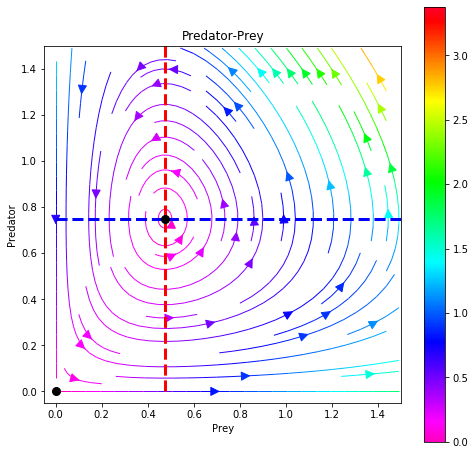

In [57]:
rangeX = (0,1.5)
rangeY = (0,1.5)
meshX, meshY = np.meshgrid(
    np.arange(rangeX[0], rangeX[1], .01), 
    np.arange(rangeY[0], rangeY[1], .01))

a = 1.2
b = 1.6
c = 1.9
d = 0.9

U = a*meshX-b*meshX*meshY
V = c*meshX*meshY-d*meshY

plotVecField(a,b,c,d,rangeX,rangeY,meshX,meshY, sol = None)

In [58]:
# 被食-捕食系のダイナミクス
def simLVModel(a,b,c,d,x0,y0,dt,tEnd):
    # 初期値
    x = x0
    y = y0
    t = 0.0

    # 時間の設定
    iEnd = int(tEnd/dt)+1

    xList = [x]
    yList = [y]
    tList = [t]
    for i in range(iEnd):
        t = dt*i
        xx = x + dt*(a - b*y)*x
        yy = y + dt*(c*x - d)*y
        x = xx
        y = yy
        tList.append(t)
        xList.append(x)
        yList.append(y)
    return (tList, xList, yList)

In [59]:
# シミュレーション

# モデルのパラメータ
a = 1.2
b = 1.6
c = 1.9
d = 0.9

x0 = 0.38
y0 = 0.32
dt = 0.0001
tEnd=10

tList, xList, yList = simLVModel(a,b,c,d,x0,y0,dt,tEnd)

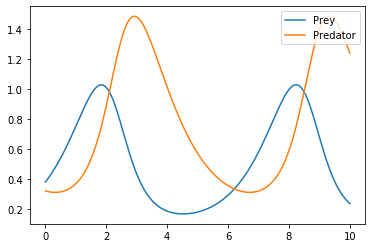

In [60]:
# 時間発展のプロット
plt.plot(tList, xList)
plt.plot(tList, yList)
plt.legend(["Prey", "Predator"],loc='upper right')

Text(0, 0.5, 'Predator')

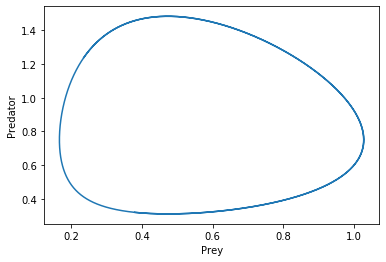

In [61]:
# 相図
plt.plot(xList,yList)
plt.xlabel("Prey")
plt.ylabel("Predator")

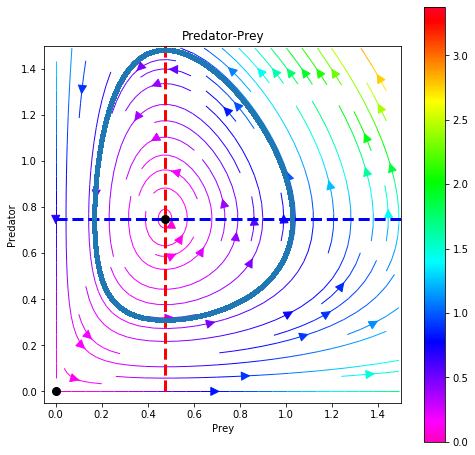

In [62]:
rangeX = (0,1.5)
rangeY = (0,1.5)
meshX, meshY = np.meshgrid(
    np.arange(rangeX[0], rangeX[1], .01), 
    np.arange(rangeY[0], rangeY[1], .01))

a = 1.2
b = 1.6
c = 1.9
d = 0.9

U = a*meshX-b*meshX*meshY
V = c*meshX*meshY-d*meshY

x0 = 0.38
y0 = 0.32
dt = 0.0001
tEnd=10

tList, xList, yList = simLVModel(a,b,c,d,x0,y0,dt,tEnd)

plotVecField(a,b,c,d,rangeX,rangeY,meshX,meshY, sol = [xList,yList])